In [1]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

dataset = pd.read_csv('letter-recog.csv')


In [3]:
 print(dataset.shape)

(19999, 17)


In [4]:
print(dataset.describe())

                  2             8             3             5             1  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       4.023651      7.035452      5.121956      5.372469      3.505975   
std        1.913206      3.304631      2.014568      2.261445      2.190441   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      7.000000      5.000000      6.000000      3.000000   
75%        5.000000      9.000000      6.000000      7.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

                8.1            13             0             6           6.1  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       6.897545      7.500175      4.628831      5.178609      8.282164   
std        2.026071      2.325087      2.699837    

In [5]:
array = dataset.values

X = array[:, 1:17]
Y = array[:, 0]

In [6]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)


X matrix dimensionality: (19999, 16)
Y vector dimensionality: (19999,)


In [7]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10)

In [8]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)


X_train:  (15999, 16)
X_validation:  (4000, 16)
Y_train:  (15999,)
Y_validation:  (4000,)


In [9]:
svc = SVC(kernel='rbf', gamma='auto', C=6)

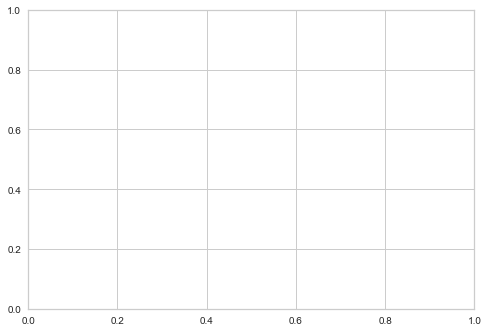

In [10]:
cm = ConfusionMatrix(svc, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [11]:
cm.fit(X_train, Y_train)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x08F8F510>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x00828E30>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

In [12]:
cm.score(X_validation, Y_validation)

0.98

In [13]:
predictions = cm.predict(X_validation)

In [14]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))


Accuracy:  0.98


In [15]:
print(confusion_matrix(Y_validation, predictions))

[[170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0 157   0   2   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 170   0   0   0   2   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 146   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   1 131   0   0   1   0   0   0   0   1   0   1   0   0
    0   2   0   0   0   0   0   0]
 [  0   2   0   0   2   0 136   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0   1 128   0   0   2   0   0   2   0   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 142   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [16]:
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000       170
           B    0.95973   0.99306   0.97611       144
           C    0.98742   0.97516   0.98125       161
           D    0.96045   0.97701   0.96866       174
           E    0.94805   0.98649   0.96689       148
           F    0.96324   0.95620   0.95971       137
           G    0.97842   0.96454   0.97143       141
           H    0.94815   0.92754   0.93773       138
           I    0.97931   0.95946   0.96928       148
           J    0.95775   0.97143   0.96454       140
           K    0.98519   0.97794   0.98155       136
           L    1.00000   0.98802   0.99398       167
           M    0.98810   0.98810   0.98810       168
           N    0.97351   0.98658   0.98000       149
           O    0.97368   0.96104   0.96732       154
           P    0.98710   0.96226   0.97452       159
           Q    0.97260   1.00000   0.98611       142
           R    0.97531   0

In [17]:
cm.poof()